In [35]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Transferencia



$$ H(s) = \dfrac{1, 356.10^7 . s^2}{s^4 + s^3 . 5207 + s^2 . 1,389 . 10^8 + s . 3,264 . 10^{11} + 3,928 . 10^{15}} $$

## 1)
Para hallar el tipo de filtro veo los valores de H en o y en el infinito

$$ H(0) = 0 $$ 
$$ H(\infty) = 0 $$

Por lo que el filtro es uno de tipo **pasabanda**

In [5]:
coef = [1, 5207, 1.389 * 10 **8, 3.264*10**11, 3.928 *10**15]

def X(s):
    return s**4 + s ** 3 * 5207 + s**2 * 1.389 * 10**8 + s*3.264 *10**11 + 3.928*10**15

def Y(s):
    return 1.356 * 10**7 * s**2

def H(s):
    return Y(s)/X(s)

In [8]:
poles = np.roots(coef)

In [9]:
p1 = np.poly1d([1, -1 * poles[0]])
p2 = np.poly1d([1, -1 * poles[1]])

In [10]:
p3 = np.poly1d([1, -1 * poles[2]])
p4 = np.poly1d([1, -1 * poles[3]])

In [11]:
P1 = p1 * p2
P1

poly1d([1.00000000e+00+0.j, 3.02992020e+03+0.j, 8.73192882e+07+0.j])

In [12]:
P2 = p3 * p4
P2

poly1d([1.00000000e+00+0.j, 2.17707980e+03+0.j, 4.49843337e+07+0.j])

In [13]:
w01 = P1[0] ** 0.5
w02 = P2[0] ** 0.5

In [14]:
w01, w02

((9344.479024826402+0j), (6707.036133042631+0j))

In [17]:
wm = (w01 + w02)/2

In [18]:
# Q1 = w01 / P1[1]
# Q2 = w02 / P2[1]

Q1 = wm / P1[1]
Q2 = wm / P2[1]

In [19]:
Q1, Q2

((2.6488346405721637+0j), (3.686478360592502+0j))

## 2)

In [28]:
# s = sp.symbols('s')
# F = 1.356 * 10**7 * s /(s**4 + s ** 3 * 5207 + s**2 * 1.389 * 10**8 + s*3.264 *10**11 + 3.928*10**15)

In [30]:
# t = sp.symbols('t')
# sp.inverse_laplace_transform(F, s, t)

In [33]:
from scipy import signal
num = [1.356 * 10**7, 0]
den = [1, 5207, 1.389 * 10**8, 3.264 *10**11, 3.928*10**15]
h = signal.TransferFunction(num, den)

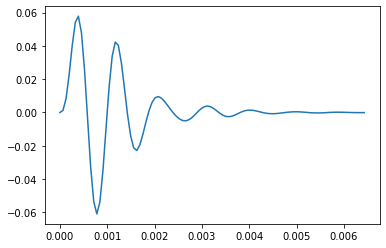

In [36]:
t,y = signal.step2(h)

plt.plot(t, 2250 * y) # Equivalente a una entrada de altura 2250

In [39]:
print(P1)

   2
1 x + 3030 x + 8.732e+07


In [40]:
print(P2)

   2
1 x + 2177 x + 4.498e+07


In [46]:
A = -0.3286794954
B = -578.208559
C = 0.3286794954
D = 297.8449494

s = sp.symbols('s')

frac_1 = (A * s + B) / (s**2 + 3030 * s + 8.732 * 10 **7)
frac_2 = (C * s + D) / (s**2 + 2177 * s + 4.498 * 10 **7)

In [48]:
frac_2

(0.3286794954*s + 297.8449494)/(s**2 + 2177*s + 44980000.0)

In [50]:
t = symbols('t', positive=True)
s, t = sp.symbols('s, t')
stepResponse1 = sp.inverse_laplace_transform(frac_1, s, t)
#stepResponse2 = sp.inverse_laplace_transform(frac2, s, t)

PolynomialError: RisingFactorial(_t + 1, 1.0) contains an element of the set of generators.